# Dataset
- **Lohoff et al., 2020**
- 8-12 somite stage mouse embryo tissue sections
- Preprocessed

In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.seqfish()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.3


First, let’s visualize cluster annotation in spatial context with squidpy.pl.spatial_scatter().

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


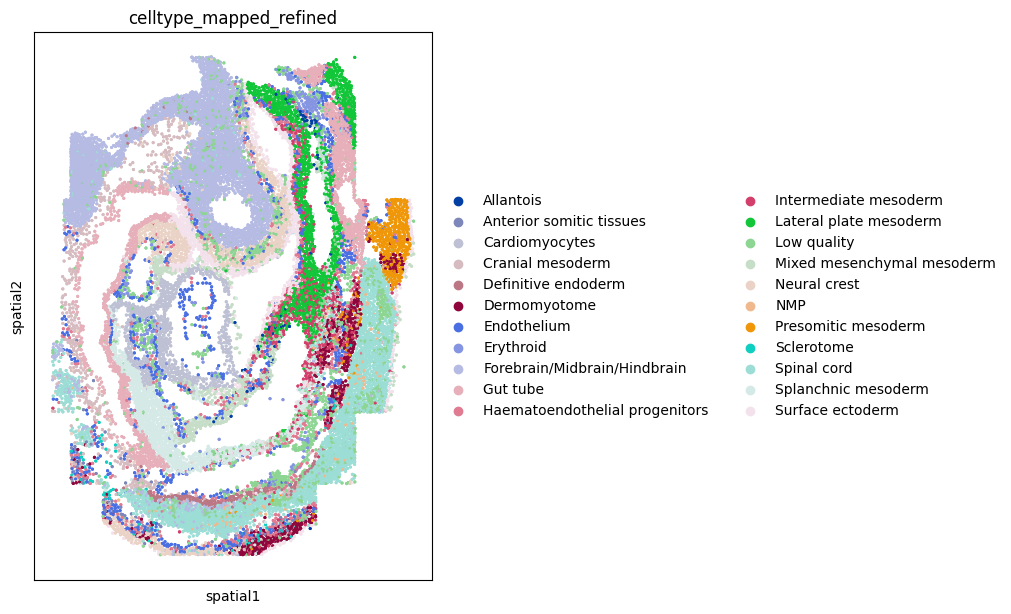

In [2]:
sq.pl.spatial_scatter(adata,color="celltype_mapped_refined", shape=None, figsize=(10, 10))

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


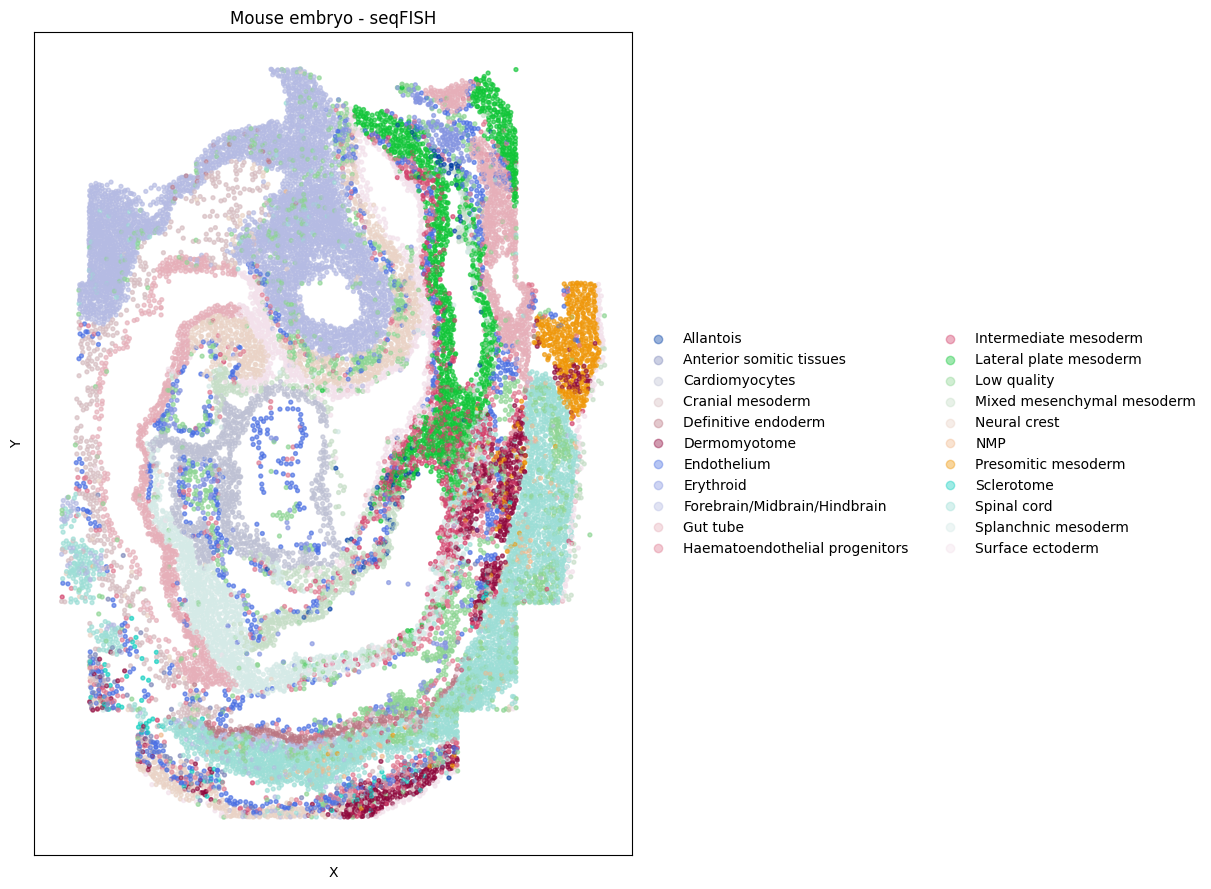

In [3]:
sq.pl.spatial_scatter(adata,
                      color="celltype_mapped_refined",
                      shape=None,
                      figsize=(12, 12),
                      title="Mouse embryo - seqFISH",
                      axis_label=["X", "Y"],
                      alpha=0.4,
                      size=30)

# Neighborhood enrichment analysis

Similar to other spatial data, we can investigate spatial organization of clusters in a quantitative way, by computing a neighborhood enrichment score. You can compute such score with the following function: squidpy.gr.nhood_enrichment(). In short, it’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being enriched. On the other hand, if they are far apart, the score will be low and they can be defined as depleted. This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute that as well. This can be done with squidpy.gr.spatial_neighbors(). Please see Building spatial neighbors graph for more details of how this function works.

Finally, we’ll directly visualize the results with squidpy.pl.nhood_enrichment(). We’ll add a dendrogram to the heatmap computed with linkage method ward.

  0%|          | 0/1000 [00:00<?, ?/s]

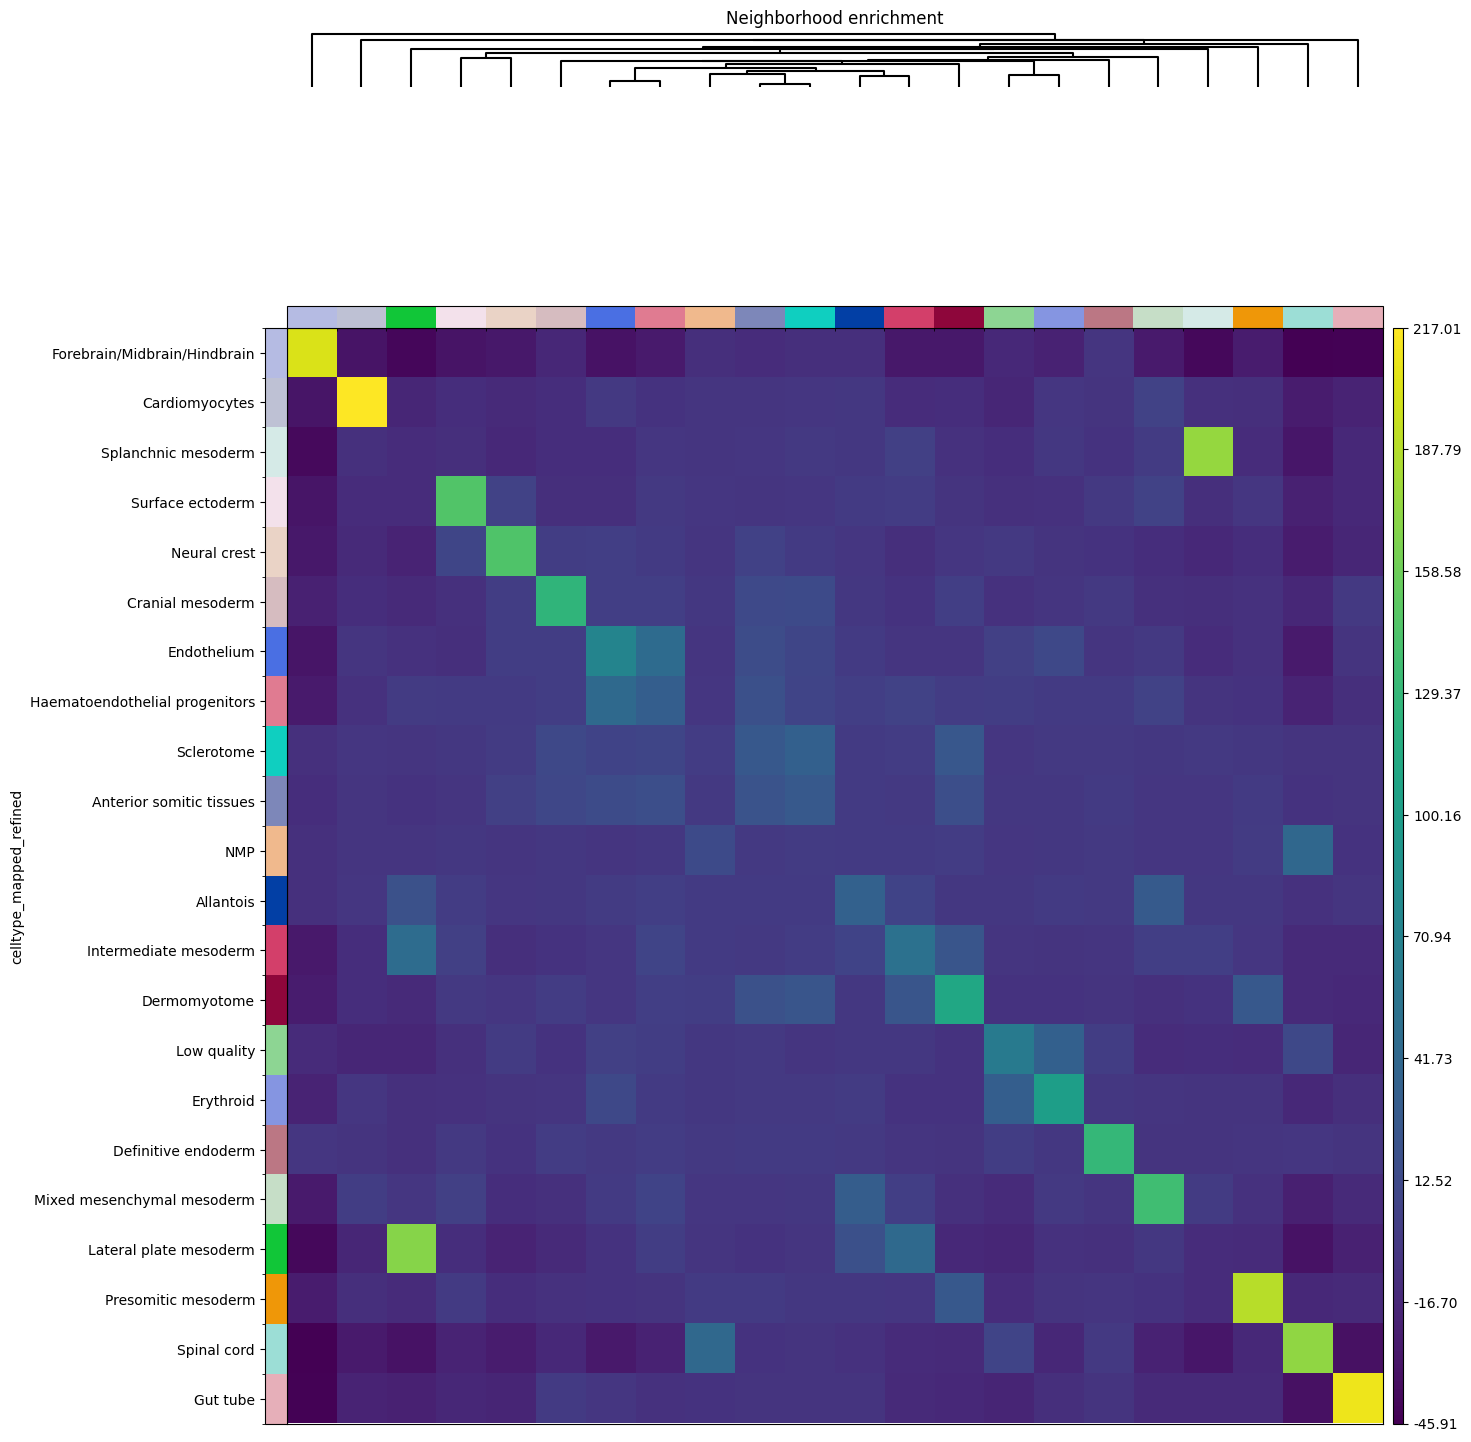

In [4]:
# Permutation nr = 1000 def
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, 
                       cluster_key="celltype_mapped_refined",
                       seed=1)
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

  0%|          | 0/50 [00:00<?, ?/s]

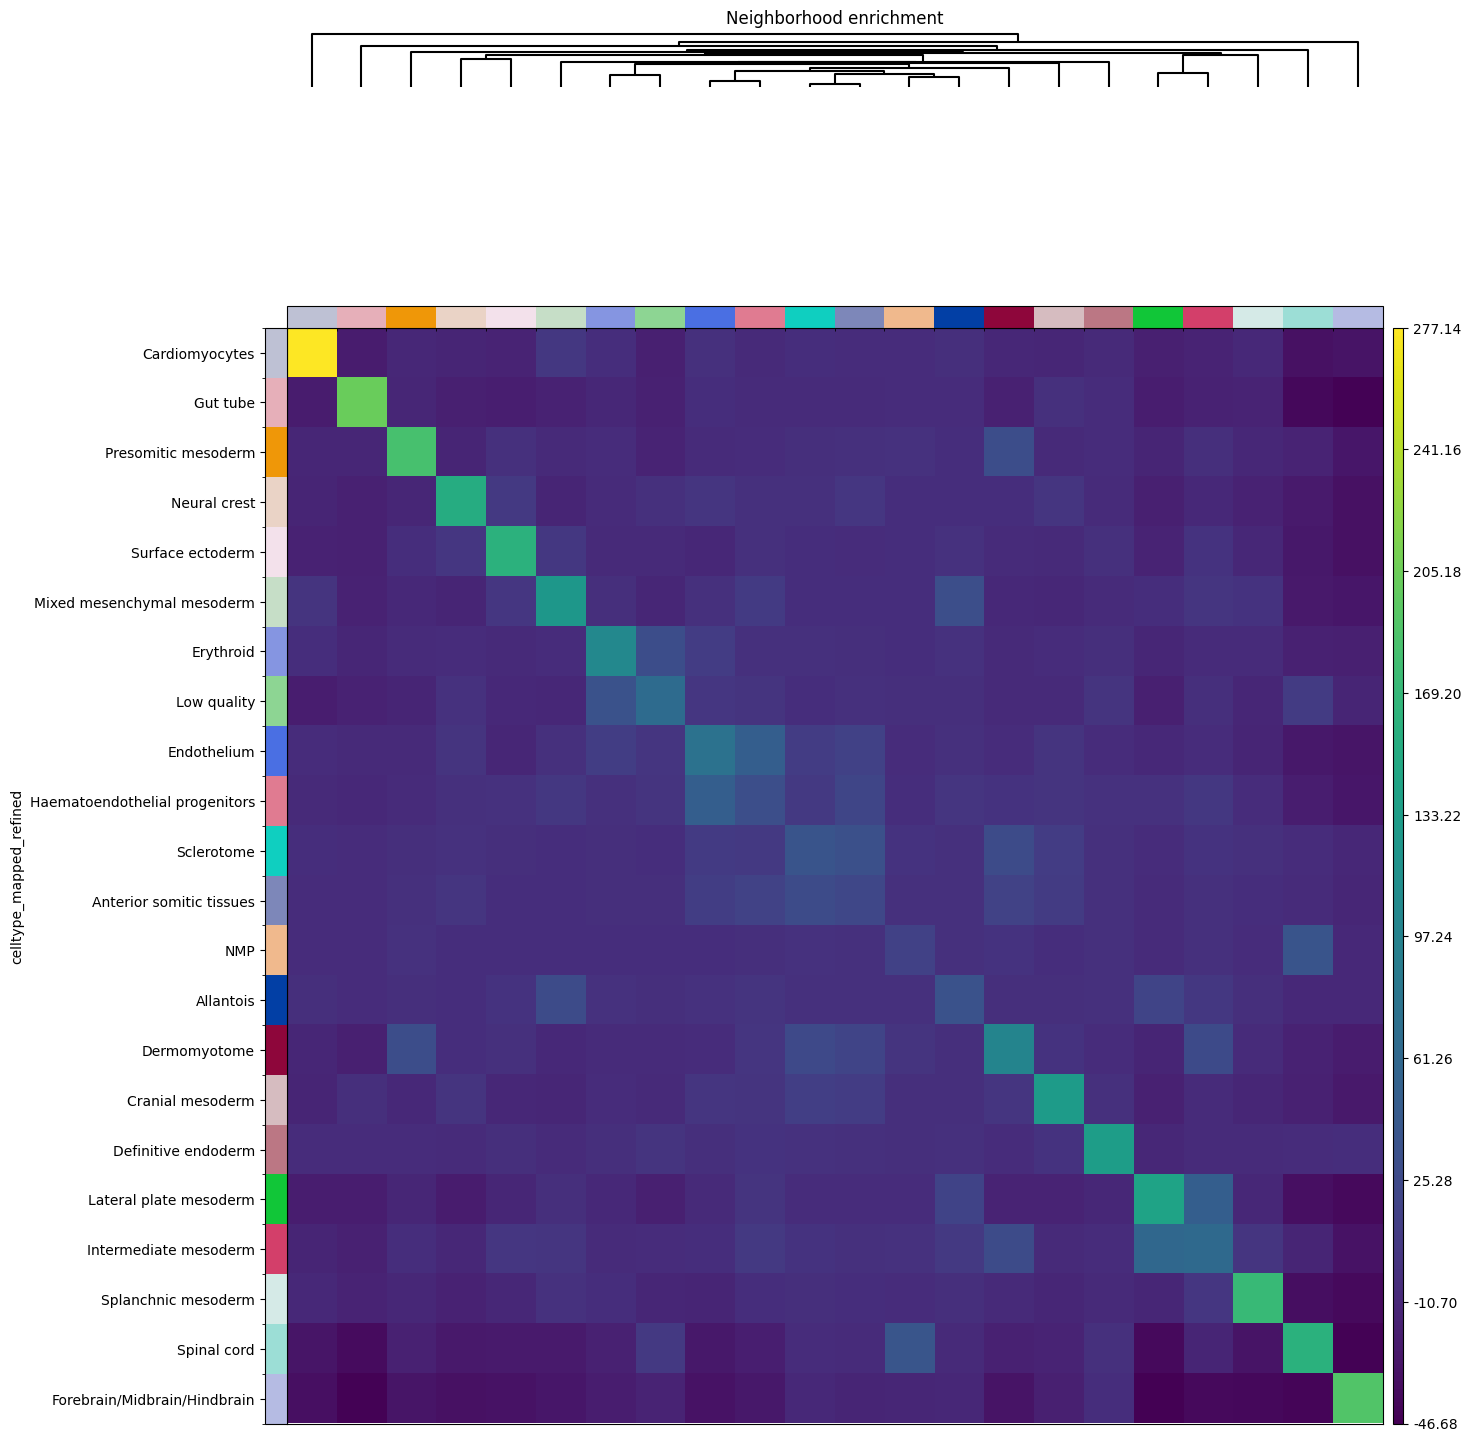

In [5]:
# Permutation nr= 50
sq.gr.nhood_enrichment(adata, 
                       cluster_key="celltype_mapped_refined",
                       show_progress_bar=True,
                       n_perms=50,
                       seed=1)
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

  0%|          | 0/10000 [00:00<?, ?/s]

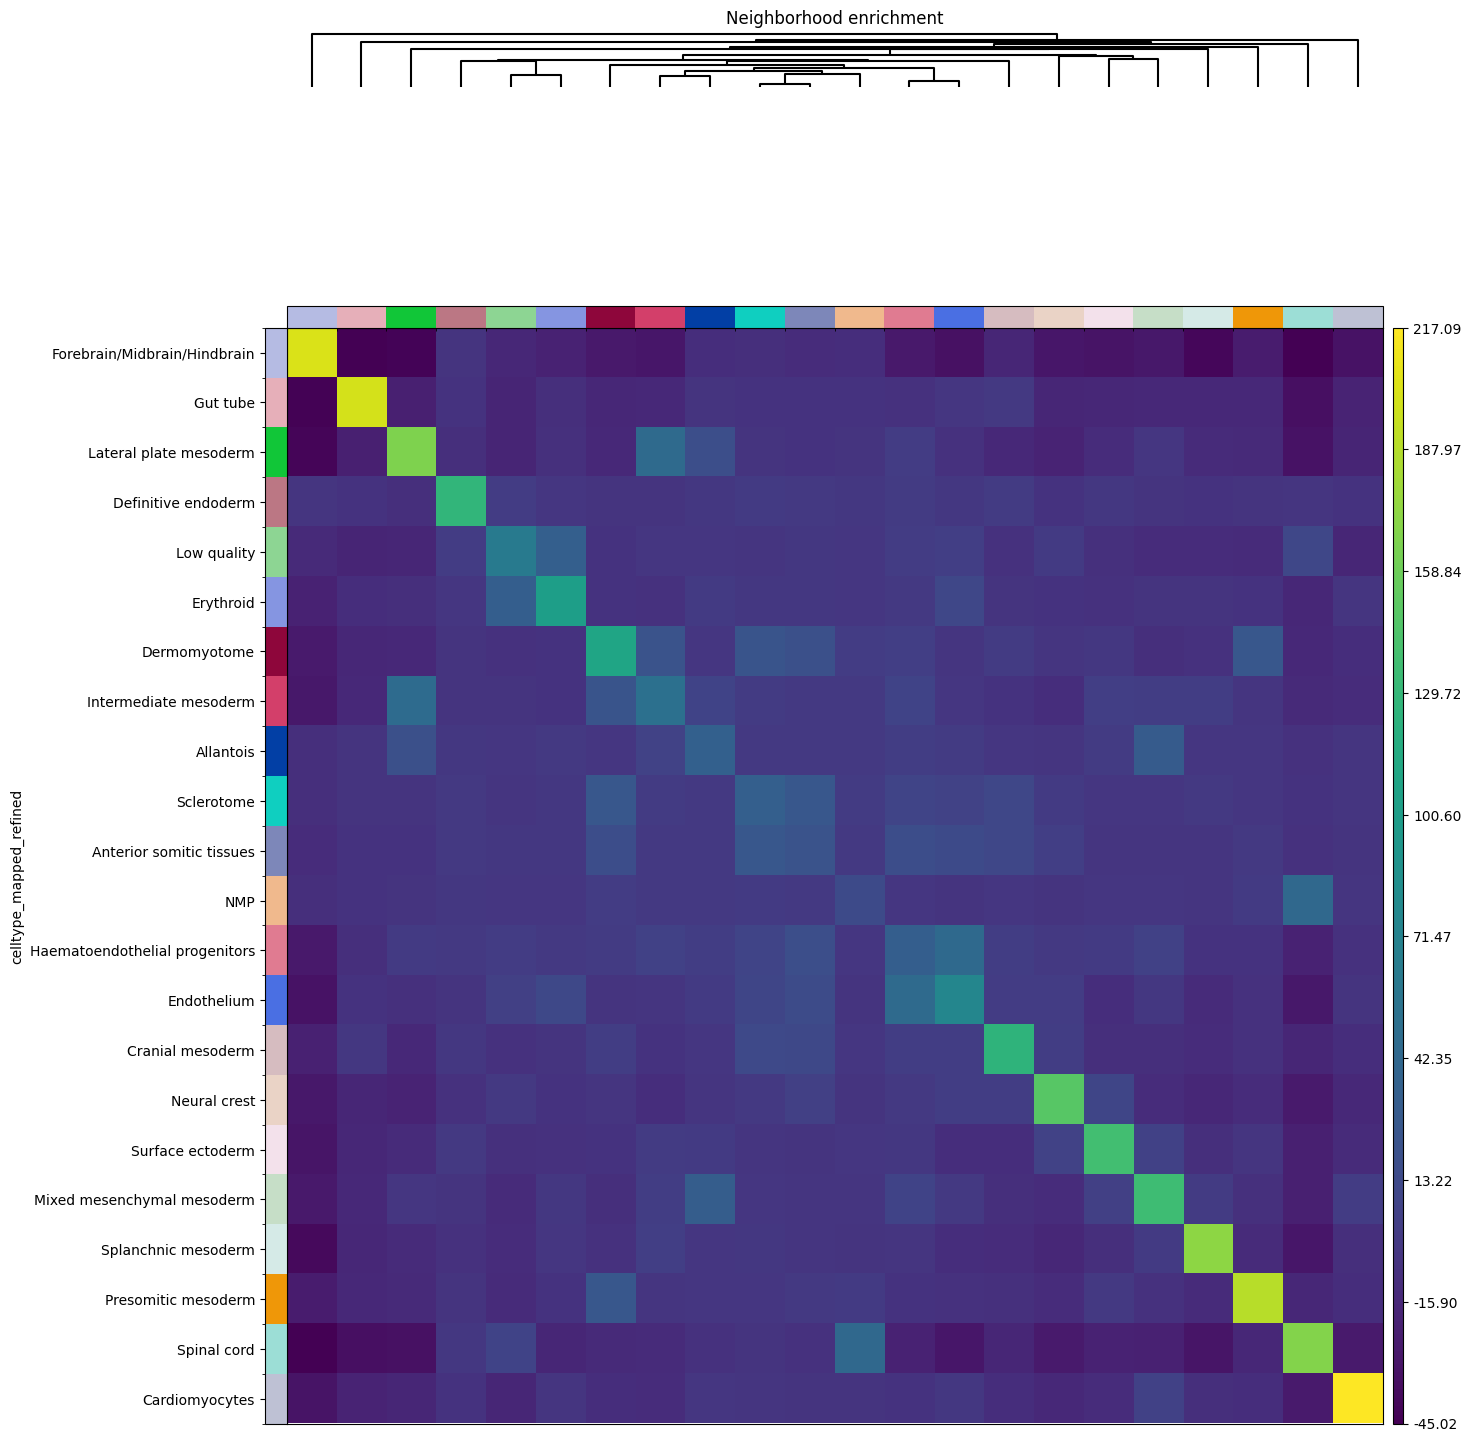

In [6]:
# Permutation nr= 10000
sq.gr.nhood_enrichment(adata, 
                       cluster_key="celltype_mapped_refined",
                       show_progress_bar=True,
                       n_perms=10000,
                       seed=1)
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")

In [7]:
hood = sq.gr.nhood_enrichment(adata, 
                       cluster_key="celltype_mapped_refined",
                       show_progress_bar=True,
                       n_perms=50,
                       seed=1,
                      copy=True)
hood

  0%|          | 0/50 [00:00<?, ?/s]

(array([[ 3.44545737e+01, -1.61750702e+00, -3.18249854e+00,
         -3.21030688e+00, -2.01415055e+00, -3.57853046e+00,
         -3.59937017e-01, -1.01454669e+00, -9.63382837e+00,
         -5.17530220e+00,  2.63515820e+00,  6.01463701e+00,
          2.00942465e+01, -3.17116886e+00,  2.69761153e+01,
         -4.53855513e+00, -1.61807401e+00, -3.60211796e+00,
         -1.32837727e+00, -9.23619529e+00, -3.37855035e+00,
          8.92300821e-01],
        [-1.53819469e+00,  2.22583477e+01, -5.08257518e+00,
          9.46485133e+00, -1.57022178e+00,  1.69965219e+01,
          1.26878225e+01, -3.37912543e+00, -1.22013941e+01,
         -6.15431579e+00,  1.67207162e+01, -1.58391421e+00,
         -6.30773209e+00, -2.76631503e+00, -4.38613861e+00,
          3.38642892e+00, -1.71962754e+00, -1.46680728e+00,
          2.74111342e+01, -6.76135241e+00, -4.68514880e+00,
         -4.78422002e+00],
        [-2.79964343e+00, -4.94875245e+00,  2.77137441e+02,
         -1.13872603e+01, -7.81763252e+00, -1.

> IDF: The nr of permutations has a huge effect on the results. The observations with nr=100 default from the tutorial weren't reproducible at nr=50 or nr=1000.

A similar analysis was performed in the original publication [Lohoff et al., 2020], and we can appreciate to what extent results overlap. For instance, there seems to be an enrichment between the Lateral plate mesoderm, the Intermediate mesoderm and a milder enrichment for Allantois cells. As in the original publication, there also seems to be an association between the Endothelium and the Haematoendothelial progenitors. Of course, results do not perfectly overlap, and this could be due to several factors:
- the construction of the neighbors graph (which in our case is not informed by the radius, as we did not have access to this information).
- the number of permutation of the neighborhood enrichment (500 in the original publication against the default 1000 in our implementation).

We can also visualize the spatial organization of cells again, and appreciate the proximity of specific cell clusters. For this, we’ll use squidpy.pl.spatial_scatter() again.

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


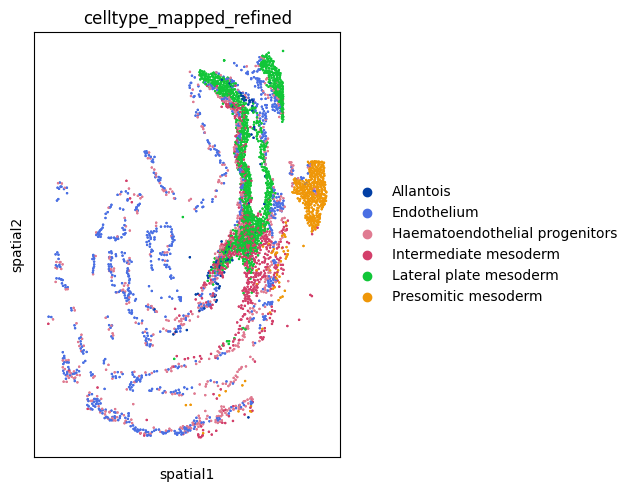

In [8]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    shape=None,
    size=2,
)

# Co-occurrence across spatial dimensions

In addition to the neighbor enrichment score, we can visualize cluster co-occurrence in spatial dimensions. This is a similar analysis of the one presented above, yet it does not operate on the connectivity matrix, but on the original spatial coordinates. The co-occurrence score is defined as:

p(exp|cond)/p(exp)

where p(exp|cond) is the conditional probability of observing a cluster conditioned on the presence of a cluster, whereas p(exp) is the probability of observing in the radius size of interest. The score is computed across increasing radii size around each cell in the tissue.

We can compute this score with squidpy.gr.co_occurrence() and set the cluster annotation for the conditional probability with the argument clusters. Then, we visualize the results with squidpy.pl.co_occurrence().

  0%|          | 0/1 [00:00<?, ?/s]

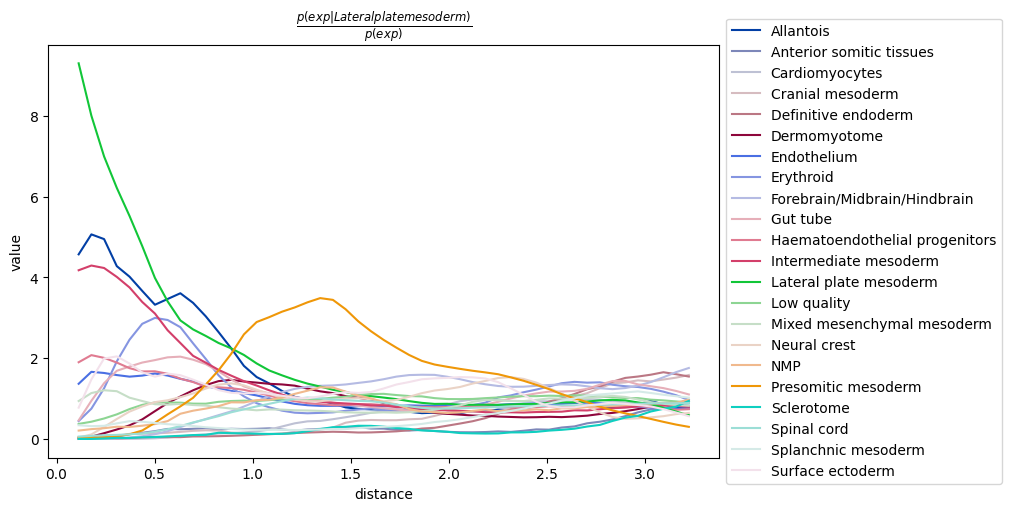

In [9]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
)

# Ligand-receptor interaction analysis

The analysis showed above has provided us with quantitative information on cellular organization and communication at the tissue level. We might be interested in getting a list of potential candidates that might be driving such cellular communication. This naturally translates in doing a ligand-receptor interaction analysis. In Squidpy, we provide a fast re-implementation the popular method CellPhoneDB [Efremova et al., 2020] (code) and extended its database of annotated ligand-receptor interaction pairs with the popular database Omnipath [Türei et al., 2016]. You can run the analysis for all clusters pairs, and all genes (in seconds, without leaving this notebook), with squidpy.gr.ligrec().

Let’s perform the analysis and visualize the result for three clusters of interest: Lateral plate mesoderm, Intermediate mesoderm and Allantois. For the visualization, we will filter out annotations with low-expressed genes (with the means_range argument) and decreasing the threshold for the adjusted p-value (with the alpha argument).



In [10]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

In [12]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="celltype_mapped_refined",
)

sq.pl.ligrec(
    adata,
    cluster_key="celltype_mapped_refined",
#     source_groups="Lateral plate mesoderm",
#     target_groups=["Intermediate mesoderm"],
    means_range=(0.3, np.inf),
    alpha=1e-4,
    swap_axes=True,
)

  0%|          | 0/100 [00:00<?, ?permutation/s]

AttributeError: 'int' object has no attribute 'values'

The dotplot visualization provides an interesting set of candidate interactions that could be involved in the tissue organization of the cell types of interest. It should be noted that this method is a pure re-implementation of the original permutation-based test, and therefore retains all its caveats and should be interpreted accordingly.

